# 🌍 Analyse mondiale des inégalités de genre sur le marché du travail

## 🎯 Objectif du projet

Ce projet a pour but d'explorer les inégalités de genre à travers le monde en s’appuyant sur un indicateur clé : le **ratio de participation des femmes par rapport aux hommes** à la population active.  
L’objectif est double :  
1. **Cartographier** les zones du monde où les écarts sont les plus marqués ou, au contraire, les plus réduits.  
2. **Analyser les liens éventuels** entre ces inégalités et d’autres variables structurantes, comme le **niveau de développement humain (IDH)** ou le **PIB par habitant**.

## 🧪 Approche

À l’aide de données publiques issues de la Banque mondiale et du PNUD, le projet combine :
- un travail de **nettoyage et de transformation des données**,
- des **analyses statistiques** (corrélation, régression),
- des techniques de **clustering non supervisé** (k-means),
- et une **visualisation géographique comparative** des résultats.

Ce projet met l’accent sur la **mise en contexte géographique** des inégalités de genre et leur relation avec le développement socio-économique, en gardant une lecture critique des données produites.

### 1. Analyse du taux de participation à la population active selon le genre (2018)

Dans cette première étape, j'analyse les données issues de la Banque Mondiale concernant le taux de participation des femmes et des hommes à la population active.

L’objectif est de visualiser le ratio femmes/hommes dans chaque pays pour l’année 2018.

	•	Les données sont filtrées pour ne conserver que les trois indicateurs pertinents : femmes, hommes, et le ratio.
	•	Un barplot horizontal est généré pour comparer visuellement ce ratio à l’échelle mondiale.
	•	Les pays où le taux de participation des femmes est supérieur à celui des hommes sont marqués d’une étoile (★) pour une meilleure lisibilité.

✅ Données nettoyées : 187


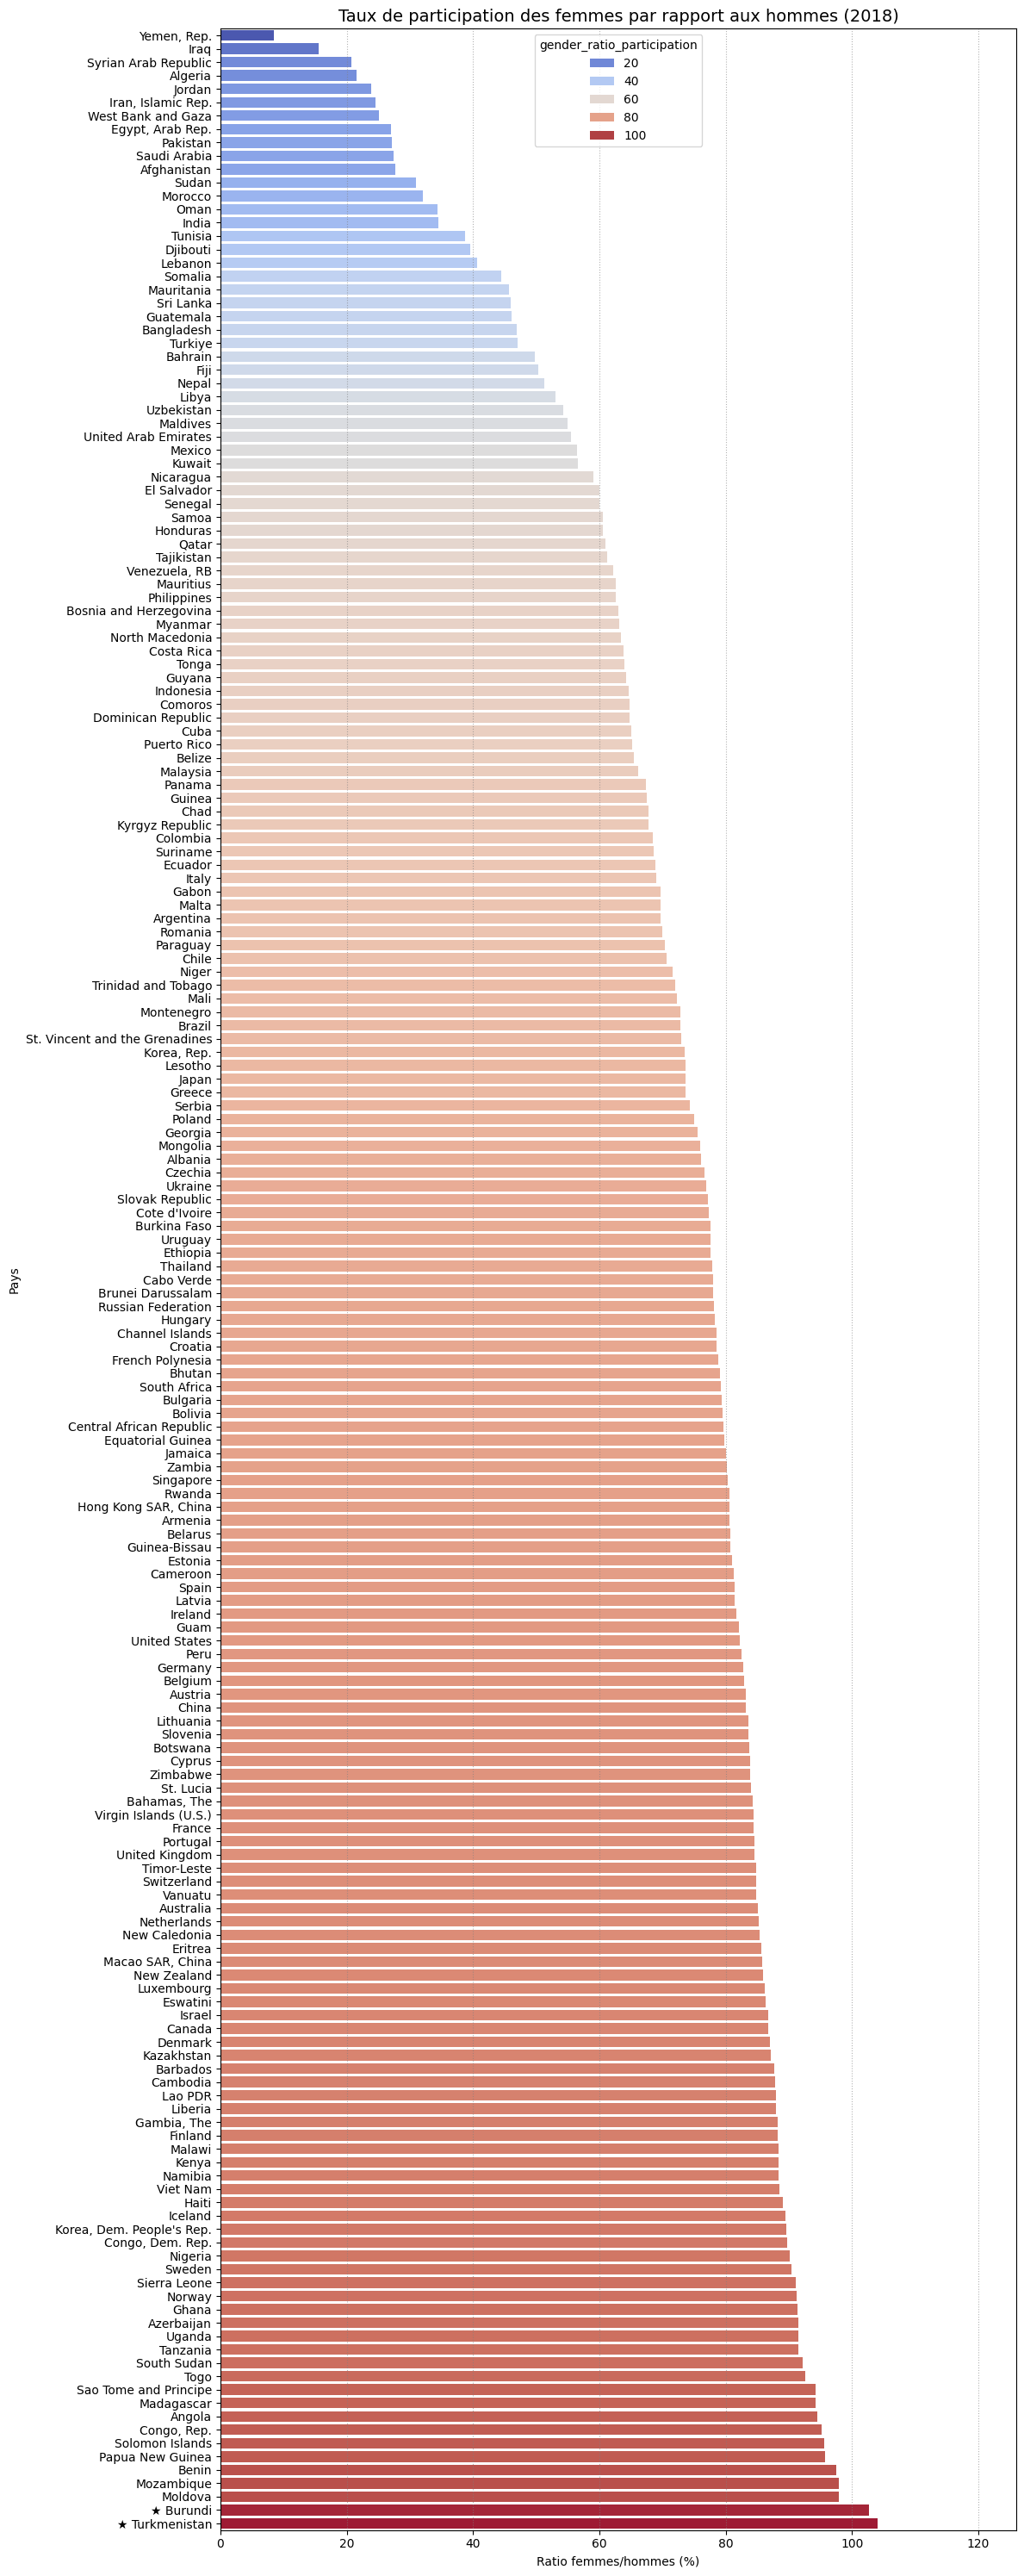

ℹ️ Pays marqués avec une étoile (★) : taux de participation des femmes > hommes (ratio > 100%) en 2018.


In [21]:
import pandas as pd

df = pd.read_csv("aa0cdb0a-a50b-45bb-bf13-f45d9c010cc1_Data.csv")

df.columns = df.columns.str.strip()

# Filtrage
df_filtered = df[df["Series Code"].isin([
    "SL.TLF.CACT.FE.ZS",  # Femmes
    "SL.TLF.CACT.MA.ZS",  # Hommes
    "SL.TLF.CACT.FM.ZS"   # Ratio
])]

# Pivot pour transformer les lignes en colonnes (1 ligne par pays)
df_pivot = df_filtered.pivot(index="Country Name",
                              columns="Series Code",
                              values="2018 [YR2018]").reset_index()

# Renommage pour plus de lisibilité
df_pivot.rename(columns={
    "SL.TLF.CACT.FE.ZS": "female_participation_rate",
    "SL.TLF.CACT.MA.ZS": "male_participation_rate",
    "SL.TLF.CACT.FM.ZS": "gender_ratio_participation"
}, inplace=True)

# Forcer la conversion en float
df_pivot["female_participation_rate"] = pd.to_numeric(df_pivot["female_participation_rate"], errors="coerce")
df_pivot["male_participation_rate"] = pd.to_numeric(df_pivot["male_participation_rate"], errors="coerce")
df_pivot["gender_ratio_participation"] = pd.to_numeric(df_pivot["gender_ratio_participation"], errors="coerce")

df_clean = df_pivot.dropna().copy()

print("✅ Données nettoyées :", len(df_clean))
df_clean.head()

df_clean["Country Name Annotated"] = df_clean.apply(
    lambda row: "★ " + row["Country Name"] if row["gender_ratio_participation"] > 100 else row["Country Name"],
    axis=1
)

import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df_clean.sort_values(by="gender_ratio_participation")

plt.figure(figsize=(12, 30))

# Barplot horizontal
sns.barplot(
    data=df_sorted,
    x="gender_ratio_participation",
    y="Country Name Annotated",
    hue="gender_ratio_participation",
    palette="coolwarm"
)

# Titres et labels
plt.title("Taux de participation des femmes par rapport aux hommes (2018)", fontsize=14)
plt.xlabel("Ratio femmes/hommes (%)")
plt.ylabel("Pays")

# Lignes de repères
for x in range(20, 121, 20):
    plt.axvline(x=x, color="gray", linestyle="dotted", linewidth=0.8, alpha=0.6)

plt.tight_layout()
plt.show()

print("ℹ️ Pays marqués avec une étoile (★) : taux de participation des femmes > hommes (ratio > 100%) en 2018.")

###  2. Comparaison des pays les plus et moins égalitaires

Pour compléter la visualisation précédente, j'extrais :

	•	les 10 pays où le ratio femmes/hommes est le plus faible (les moins égalitaires),
	•	les 10 pays où le ratio est le plus élevé (les plus égalitaires).

Le tableau ci-dessous présente les **10 pays les moins égalitaires** (ratio femmes/hommes le plus faible) et les **10 pays les plus égalitaires** (ratio le plus élevé) en matière de participation à la population active.

> ℹ️ **Définition de la variable `gender_ratio_participation` :**  
> Il s'agit du **rapport entre le taux de participation des femmes et celui des hommes** à la population active.  
> - Un ratio de `100 %` signifie une parfaite égalité.  
> - Un ratio inférieur à `100 %` signifie que les femmes participent **moins** que les hommes.  
> - Un ratio supérieur à `100 %` indique que les femmes participent **plus** que les hommes.

Les valeurs ont été arrondies pour faciliter la lisibilité.

In [27]:
df_sorted = df_clean.sort_values(by="gender_ratio_participation")

# Top 10 et Bottom 10
worst_10 = df_sorted.head(10).copy()
best_10 = df_sorted.tail(10).copy()

# Fusion
df_compare = pd.concat([worst_10, best_10], ignore_index=True)

# Stockage des vraies valeurs pour le dégradé
color_values = df_compare["gender_ratio_participation"].astype(float)

# Formatage des pourcentages
for col in ["female_participation_rate", "male_participation_rate", "gender_ratio_participation"]:
    df_compare[col] = df_compare[col].round(0).astype(int).astype(str) + " %"

df_display = df_compare[[
    "Country Name",
    "female_participation_rate",
    "male_participation_rate",
    "gender_ratio_participation"
]]

# Mise en forme visuelle avec dégradé
styled = df_display.style.background_gradient(
    subset=["gender_ratio_participation"],
    cmap="coolwarm",
    gmap=color_values
).format(na_rep="-")

from IPython.display import display, Markdown
display(Markdown("📊 **Tableau comparatif des pays aux extrêmes du ratio femmes/hommes :**"))
display(styled)

# Légende explicative
display(Markdown("""
🔵 = Ratio femmes/hommes faible (moins égalitaire) &nbsp;&nbsp;&nbsp;&nbsp;
🔴 = Ratio femmes/hommes élevé (plus égalitaire)
📌 *Remarque : Le `gender ratio` correspond au pourcentage de femmes actives pour 100 hommes actifs dans la population active.*
"""))

📊 **Tableau comparatif des pays aux extrêmes du ratio femmes/hommes :**

Series Code,Country Name,female_participation_rate,male_participation_rate,gender_ratio_participation
0,"Yemen, Rep.",5 %,60 %,9 %
1,Iraq,11 %,73 %,16 %
2,Syrian Arab Republic,13 %,63 %,21 %
3,Algeria,15 %,69 %,22 %
4,Jordan,15 %,61 %,24 %
5,"Iran, Islamic Rep.",17 %,71 %,25 %
6,West Bank and Gaza,18 %,70 %,25 %
7,"Egypt, Arab Rep.",18 %,68 %,27 %
8,Pakistan,22 %,79 %,27 %
9,Saudi Arabia,22 %,80 %,27 %



🔵 = Ratio femmes/hommes faible (moins égalitaire) &nbsp;&nbsp;&nbsp;&nbsp;
🔴 = Ratio femmes/hommes élevé (plus égalitaire)
📌 *Remarque : Le `gender ratio` correspond au pourcentage de femmes actives pour 100 hommes actifs dans la population active.*


### 3. Corrélation entre PIB/habitant et égalité de participation

L’objectif est d’évaluer s’il existe un lien entre le niveau de richesse économique d’un pays (mesuré par le PIB par habitant) et le degré d’égalité entre femmes et hommes en matière de participation à la population active.

	•	Visualisation : un nuage de points met en relation le PIB/habitant (en échelle logarithmique) et le ratio de participation femmes/hommes.
	•	Régression linéaire : une droite est ajustée aux données afin d’observer la tendance générale. Nous calculons également :
	•	le coefficient de corrélation de Pearson pour quantifier l’intensité du lien linéaire entre les deux variables.
	•	le R² (coefficient de détermination) pour mesurer la part de la variance expliquée.

✅ Données fusionnées : 183


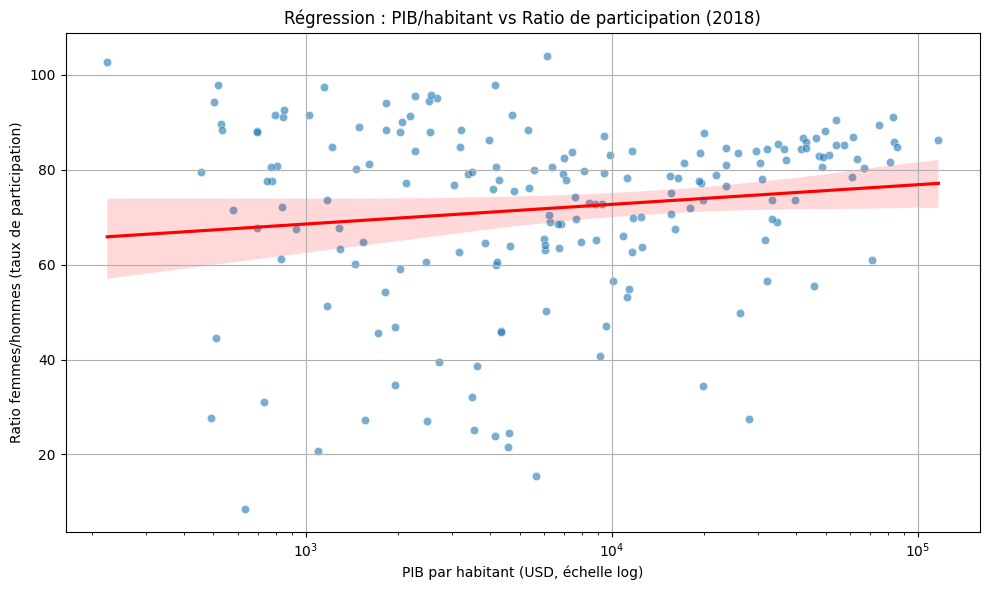

📐 Coefficient de détermination R² : 0.019
📈 Corrélation (Pearson) entre PIB/habitant et ratio femmes/hommes : 0.223


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Chargement et nettoyage du fichier PIB/habitant
df_pib = pd.read_csv("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_85121.csv", skiprows=4)
df_pib_clean = df_pib[["Country Name", "Country Code", "2018"]].copy()
df_pib_clean.rename(columns={"2018": "GDP_per_capita"}, inplace=True)
df_pib_clean.dropna(inplace=True)

# Fusion avec les données de participation
df_merged = pd.merge(df_clean, df_pib_clean, on="Country Name")
print("✅ Données fusionnées :", len(df_merged))

plt.figure(figsize=(10, 6))

# Nuage de points
sns.scatterplot(data=df_merged,
                x="GDP_per_capita",
                y="gender_ratio_participation",
                alpha=0.6)

# Régression linéaire (log-échelle sur X)
sns.regplot(data=df_merged,
            x="GDP_per_capita",
            y="gender_ratio_participation",
            logx=True,
            scatter=False,
            line_kws={'color': 'red', 'label': 'Régression linéaire'})

plt.xscale("log")
plt.xlabel("PIB par habitant (USD, échelle log)")
plt.ylabel("Ratio femmes/hommes (taux de participation)")
plt.title("Régression : PIB/habitant vs Ratio de participation (2018)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Régression linéaire + métriques
df_merged["log_GDP_per_capita"] = np.log(df_merged["GDP_per_capita"])

X = df_merged[["log_GDP_per_capita"]]
y = df_merged["gender_ratio_participation"]

model = LinearRegression()
model.fit(X, y)

r_squared = model.score(X, y)
print("📐 Coefficient de détermination R² :", round(r_squared, 3))

correlation = df_merged["GDP_per_capita"].corr(df_merged["gender_ratio_participation"])
print("📈 Corrélation (Pearson) entre PIB/habitant et ratio femmes/hommes :", round(correlation, 3))

### 4. Segmentation des pays avec un clustering K-Means

Dans cette section, j'utilise un algorithme de clustering K-Means afin de regrouper les pays selon leur profil de participation au marché du travail par genre. L’objectif est d’identifier des paternes communs et de voir si certains pays partagent des caractéristiques similaires.

Les variables utilisées pour le regroupement sont :
	•	le taux de participation des femmes,
	•	le taux de participation des hommes,
	•	et le gender ratio participation (nombre de femmes actives pour 100 hommes actifs).

Nous choisissons ici de créer 4 groupes (clusters).
L’analyse qui suit permet d’interpréter ces groupes en observant :
	•	les moyennes des indicateurs par cluster,
	•	les pays qui composent chaque cluster, ce qui peut révéler des logiques régionales, culturelles ou économiques.

In [4]:
from sklearn.preprocessing import StandardScaler

features = ["female_participation_rate", "male_participation_rate", "gender_ratio_participation"]

X = df_clean[features].copy()

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Données normalisées prêtes pour le clustering.")

✅ Données normalisées prêtes pour le clustering.


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Sélection des colonnes
features = df_clean[["female_participation_rate", "male_participation_rate", "gender_ratio_participation"]].copy()

# Standardisation des données
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Application du K-Means avec 4 groupes
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df_clean["Cluster"] = kmeans.fit_predict(scaled_features)

# Affichage des pays avec leur groupe
df_clean[["Country Name", "Cluster"]].sort_values(by="Cluster").reset_index(drop=True)

Series Code,Country Name,Cluster
0,Argentina,0
1,Belgium,0
2,Bulgaria,0
3,Chad,0
4,Burkina Faso,0
...,...,...
182,Syrian Arab Republic,3
183,Turkiye,3
184,Tunisia,3
185,West Bank and Gaza,3


In [6]:
# Moyenne des indicateurs par cluster
df_clean.groupby("Cluster")[["female_participation_rate", "male_participation_rate", "gender_ratio_participation"]].mean().round(1)

Series Code,female_participation_rate,male_participation_rate,gender_ratio_participation
Cluster,,,
0,42.8,63.0,68.7
1,63.2,80.8,78.4
2,56.3,67.7,83.5
3,23.1,69.6,33.1


In [7]:
# Quelques exemples de pays par cluster
for c in range(4):
    print(f"\n🧩 Cluster {c} :")
    display(df_clean[df_clean["Cluster"] == c][["Country Name", "gender_ratio_participation"]]
            .sort_values(by="gender_ratio_participation").head(10))


🧩 Cluster 0 :


Series Code,Country Name,gender_ratio_participation
138,Nepal,51.328354
113,Libya,53.081685
208,Uzbekistan,54.334772
121,Maldives,54.976768
127,Mexico,56.462611
59,El Salvador,60.008014
167,Senegal,60.054846
163,Samoa,60.540159
190,Tajikistan,61.299898
210,"Venezuela, RB",62.152514



🧩 Cluster 1 :


Series Code,Country Name,gender_ratio_participation
14,Bahrain,49.723858
204,United Arab Emirates,55.445459
106,Kuwait,56.558137
142,Nicaragua,59.101589
85,Honduras,60.600118
159,Qatar,61.012679
135,Myanmar,63.210576
46,Costa Rica,63.793329
90,Indonesia,64.596175
56,Dominican Republic,64.794413



🧩 Cluster 2 :


Series Code,Country Name,gender_ratio_participation
40,Chile,70.604399
196,Trinidad and Tobago,72.017956
104,"Korea, Rep.",73.555466
111,Lesotho,73.647878
98,Japan,73.670587
72,Georgia,75.503542
131,Mongolia,75.997414
1,Albania,76.119049
52,Czechia,76.680332
173,Slovak Republic,77.142646



🧩 Cluster 3 :


Series Code,Country Name,gender_ratio_participation
214,"Yemen, Rep.",8.506404
92,Iraq,15.539643
189,Syrian Arab Republic,20.804636
2,Algeria,21.520354
99,Jordan,23.828424
91,"Iran, Islamic Rep.",24.557105
213,West Bank and Gaza,25.164535
58,"Egypt, Arab Rep.",27.066155
149,Pakistan,27.207144
166,Saudi Arabia,27.437077


In [8]:
# Décompression dans un dossier
!unzip -o ne_110m_admin_0_countries.zip -d /content/world_map

Archive:  ne_110m_admin_0_countries.zip
  inflating: /content/world_map/ne_110m_admin_0_countries.README.html  
 extracting: /content/world_map/ne_110m_admin_0_countries.VERSION.txt  
 extracting: /content/world_map/ne_110m_admin_0_countries.cpg  
  inflating: /content/world_map/ne_110m_admin_0_countries.dbf  
  inflating: /content/world_map/ne_110m_admin_0_countries.prj  
  inflating: /content/world_map/ne_110m_admin_0_countries.shp  
  inflating: /content/world_map/ne_110m_admin_0_countries.shx  


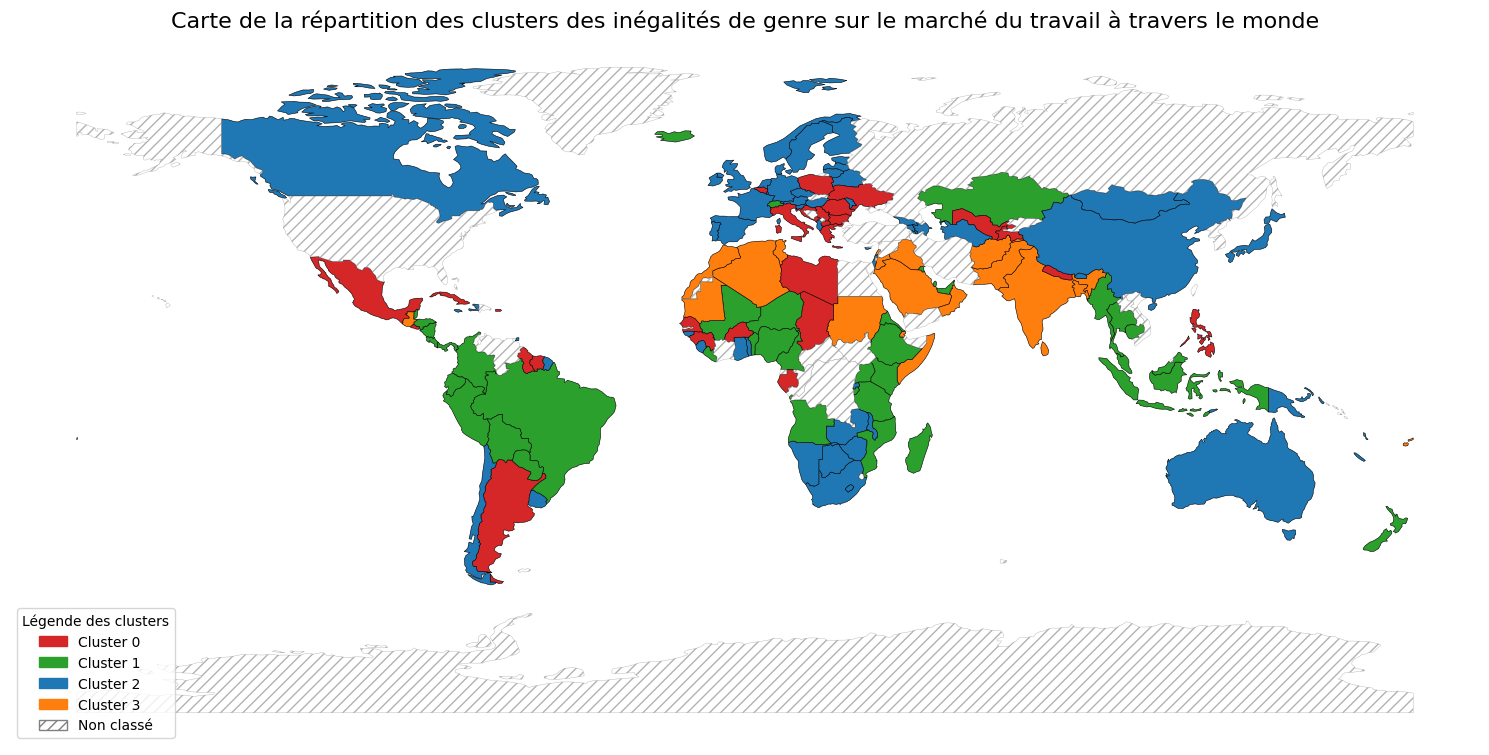

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

world = gpd.read_file("/content/world_map/ne_110m_admin_0_countries.shp")

# Fusion avec les clusters
world_clustered = world.merge(df_clean[["Country Name", "Cluster"]], left_on="NAME", right_on="Country Name", how="left")

# Couleurs personnalisées pour les clusters
cluster_colors = {
    0: "#d62728",  # Bleu
    1: "#2ca02c",  # Orange/Jaune
    2: "#1f77b4",  # Vert
    3: "#ff7f0e",  # Rouge
}

world_clustered["color"] = world_clustered["Cluster"].map(cluster_colors)

fig, ax = plt.subplots(figsize=(15, 10))

# Tracer les pays classés
world_clustered[world_clustered["Cluster"].notna()].plot(
    ax=ax,
    color=world_clustered.loc[world_clustered["Cluster"].notna(), "color"],
    edgecolor="black",
    linewidth=0.4
)

# Marquage des pays non classés
world_clustered[world_clustered["Cluster"].isna()].plot(
    ax=ax,
    color="white",
    edgecolor="gray",
    linewidth=0.3,
    hatch="///",   # hachure
    alpha=0.6
)

# Titre et suppression des axes
ax.set_title("Carte de la répartition des clusters des inégalités de genre sur le marché du travail à travers le monde", fontsize=16)
ax.axis("off")

# Légende
legend_patches = [
    mpatches.Patch(color="#d62728", label="Cluster 0"),  #d62728
    mpatches.Patch(color="#2ca02c", label="Cluster 1"),  #2ca02c
    mpatches.Patch(color="#1f77b4", label="Cluster 2"),  #1f77b4
    mpatches.Patch(color="#ff7f0e", label="Cluster 3"),
    mpatches.Patch(facecolor="white", edgecolor="gray", label="Non classé", hatch="///")
]
ax.legend(handles=legend_patches, loc="lower left", title="Légende des clusters")

plt.tight_layout()
plt.show()

**🧠 Synthèse des profils de clusters**

Le clustering K-Means a permis d’identifier 4 groupes distincts de pays selon trois indicateurs :
- Taux de participation des femmes
- Taux de participation des hommes
- Ratio femmes/hommes (% de femmes actives pour 100 hommes actifs)

🔴 Cluster 0 : Participation modérée et faible égalité
- Femmes : ~43%
- Hommes : ~63%
- Ratio femmes/hommes : ~69%
- Profil : pays avec un écart de genre marqué et une participation féminine relativement faible.

🟢 Cluster 1 : Pays les plus égalitaires et actifs
- Femmes : ~63%
- Hommes : ~81%
- Ratio femmes/hommes : ~78%
- Profil : forte participation des deux sexes, avec un bon niveau d’égalité relative.

⚠️ *Dans certains de ces pays, **les taux élevés** reflètent éventuellement **une entrée précoce sur le marché du travail** / un faible taux de poursuite d'études. Ces facteurs socio-économiques peuvent masquer **des inégalités structurelles** malgré un ratio élevé.*



🔵 Cluster 2 : Pays à bonne égalité malgré une participation masculine plus faible
- Femmes : ~56%
- Hommes : ~68%
- Ratio femmes/hommes : ~84%
- Profil : pays où la participation des femmes est presque équivalente à celle des hommes.

🟠 Cluster 3 : Pays très inégalitaires
- Femmes : ~23%
- Hommes : ~70%
- Ratio femmes/hommes : ~33%
- Profil : très forte inégalité de genre dans l’accès au marché du travail.

*Note : les numéros de cluster sont distribués arbitrairement*

### 🌐 Répartition géographique

On observe une certaine logique régionale :
- **Europe de l'Ouest, Amérique du Nord, Océanie** : majoritairement cluster 1 (forte intégration des femmes)
- **Afrique du Nord, Moyen-Orient** : cluster 3 (fortes inégalités)
- **Amérique latine, Asie du Sud-Est, Afrique Centrale** : cluster 1, (forte participation des deux sexes, possiblement une entrée jeune sur le marché du travail)
- **Europe de l'Est, et zones géographiques plus éparses** :

Cette classification met en évidence des inégalités structurelles profondes dans l'accès au marché du travail selon les pays.

L'analyse de cette carte peut aller plus loin en la comparant avec une carte de l'Indice de Développement Humain (IDH) mondial.

In [11]:
import pandas as pd

idh_data = pd.read_excel("HDR25_Statistical_Annex_HDI_Table.xlsx", sheet_name='Table 1. HDI', skiprows=4)

# Nettoyage + renommage
idh_data_clean = idh_data.rename(columns={
    "Unnamed: 1": "Country Name",
    "Human Development Index (HDI) ": "IDH"
})[["Country Name", "IDH"]]

idh_data_clean.dropna(subset=["Country Name", "IDH"], inplace=True)

# Fusion avec les données principales
df_merged = df_clean.merge(idh_data_clean, on="Country Name", how="left")

print("✅ Fusion terminée. Aperçu des données enrichies :")
df_merged[["Country Name", "gender_ratio_participation", "IDH"]].head()

✅ Fusion terminée. Aperçu des données enrichies :


,Country Name,gender_ratio_participation,IDH
0,Afghanistan,27.751625,0.496
1,Albania,76.119049,0.81
2,Algeria,21.520354,0.763
3,Angola,94.467953,0.616
4,Argentina,69.744274,0.865


In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

idh_values = df_merged[["IDH"]].dropna()

# Standardisation
scaler = StandardScaler()
idh_scaled = scaler.fit_transform(idh_values)

# Clustering K-Means (4 groupes)
kmeans_idh = KMeans(n_clusters=4, random_state=42, n_init='auto')
clusters_idh = kmeans_idh.fit_predict(idh_scaled)

df_merged.loc[idh_values.index, "IDH_Cluster"] = clusters_idh

print("✅ Clustering IDH terminé. Aperçu :")
df_merged[["Country Name", "IDH", "IDH_Cluster"]].head()

# Calcul de la moyenne
df_merged.groupby("IDH_Cluster")["IDH"].mean().round(3)

✅ Clustering IDH terminé. Aperçu :


,IDH
IDH_Cluster,
0.0,0.490929
1.0,0.781346
2.0,0.9188
3.0,0.638938


In [13]:
# Création de la carte fusionnée pour les clusters IDH
world_clustered_idh = world.merge(
    df_merged[["Country Name", "IDH_Cluster"]],
    left_on="NAME",
    right_on="Country Name",
    how="left"
)

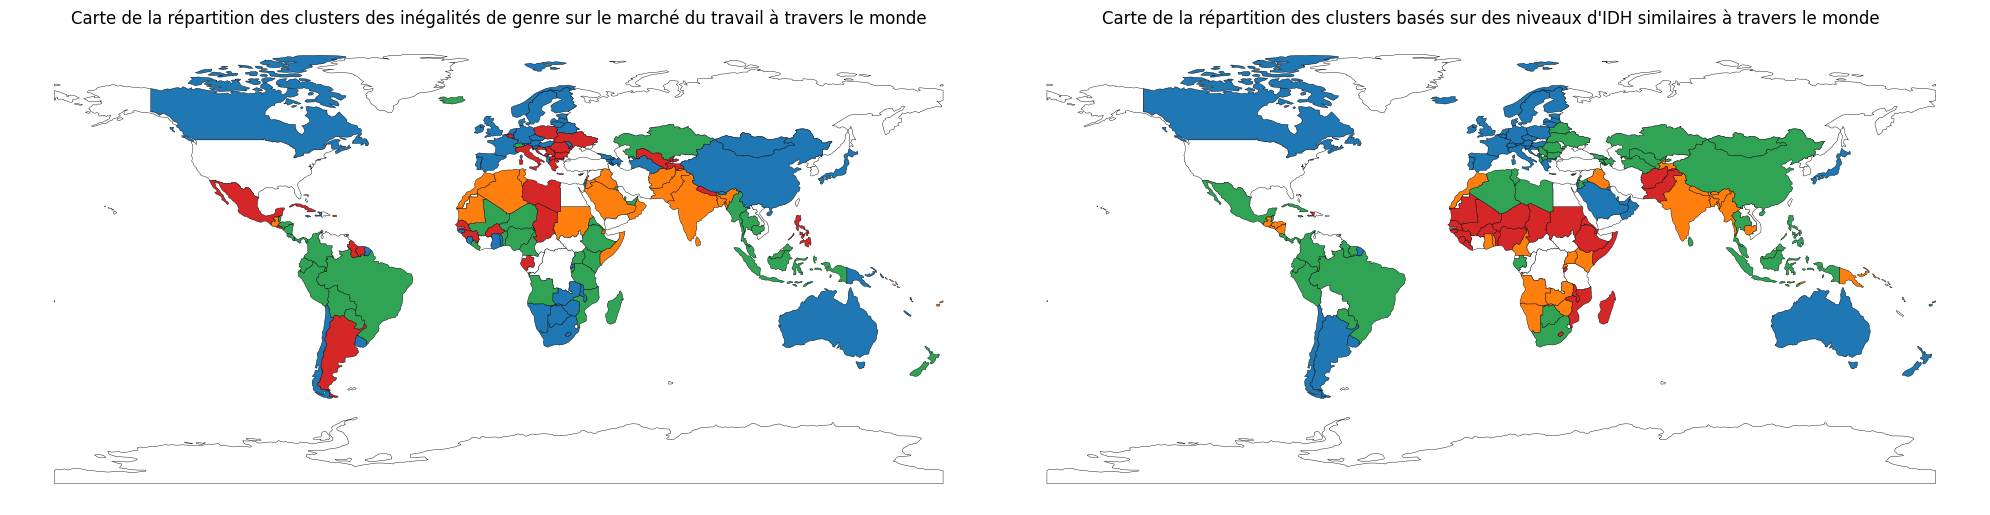

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file("/content/world_map/ne_110m_admin_0_countries.shp")

# Fusion avec les clusters
world_clustered_gender = world.merge(df_clean[["Country Name", "Cluster"]], left_on="NAME", right_on="Country Name", how="left")
world_clustered_idh = world.merge(df_merged[["Country Name", "IDH_Cluster"]], left_on="NAME", right_on="Country Name", how="left")

# Synchro Couleurs
color_mapping = {
   0: "#d62728",  # rouge foncé = IDH le plus bas
    3: "#ff7f0e",  # orange = IDH moyen
    1: "#31a354",  # vert = IDH élevé
    2: "#1f77b4",  # bleu = IDH très élevé
}

world_clustered_gender["color"] = world_clustered_gender["Cluster"].map(color_mapping)
world_clustered_idh["color"] = world_clustered_idh["IDH_Cluster"].map(color_mapping)


fig, axes = plt.subplots(ncols=2, figsize=(20, 10))

# Carte 1 : Ratio femmes/hommes
world_clustered_gender["color"] = world_clustered_gender["color"].fillna("white")
world_clustered_gender.plot(color=world_clustered_gender["color"], ax=axes[0],
                            edgecolor="black", linewidth=0.3,
                            )
axes[0].set_title("Carte de la répartition des clusters des inégalités de genre sur le marché du travail à travers le monde", fontsize=12)
axes[0].axis("off")

# Carte 2 : IDH
world_clustered_idh["color"] = world_clustered_idh["color"].fillna("white")
world_clustered_idh.plot(color=world_clustered_idh["color"], ax=axes[1],
                         edgecolor="black", linewidth=0.3,
                         )
axes[1].set_title("Carte de la répartition des clusters basés sur des niveaux d'IDH similaires à travers le monde", fontsize=12)
axes[1].axis("off")

plt.tight_layout()
plt.show()

## 🌍 Légende des clusters de l'Indice de Développement Humain (IDH)

Chaque pays a été regroupé dans un cluster selon la **valeur de son IDH**. Voici la signification des **couleurs attribuées** à chaque cluster :

*Note : les numéros de Clusters sont distribués arbitrairement*

-  🔴 **Cluster 0** : IDH faible (moyenne de **0.49**)   
    → Représente les pays avec un développement humain très faible
  Exemples : Tchad, Niger, Centrafrique

- 🟠 **Cluster 3** : IDH moyen (moyenne de **0.63**)  
  → Pays à développement humain faible à intermédiaire  
  Exemples : Inde, Cameroun, Cambodge

- 🟢 **Cluster 1** : IDH élevé (moyenne de **0.78**)   
  → Pays à développement humain élevé
  Exemples : Brésil, Indonésie, Chine

- 🔵 **Cluster 2** : IDH très élevé (moyenne de **0.91**)  
  → Les pays les plus développés en termes d'IDH
  Exemples : France, Canada, Australie

---

### 🧭 Remarque :

L’IDH (Indice de Développement Humain) est un indicateur composite prenant en compte :  
- l’espérance de vie à la naissance,  
- le niveau d’éducation,  
- le revenu national brut par habitant.

Il fournit donc une **vision synthétique du niveau de développement** d’un pays.

## Comparaison des clusters : inégalités de genre vs. IDH

L’objectif de cette comparaison est de visualiser si les pays ayant des niveaux de développement humain (IDH) similaires présentent également des similitudes en termes d’égalité femmes/hommes sur le marché du travail.

En d’autres termes : **le niveau de développement humain est-il un facteur explicatif des inégalités de genre dans la participation à la population active ?**

### Conclusion

Une lecture croisée des deux cartes est peu adaptée, néanmoins on constate que les clusters varient plus ou moins en fonctions des zones géographiques. On peut déduire qu'il existe une **corrélation partielle** entre développement humain et égalité de genre sur le marché du travail. Toutefois, **d’importantes exceptions** invitent à considérer d’autres dimensions explicatives (culture, politique, normes sociales) comme en témoigne le cas de certains pays du Moyen-Orient combinant IDH élevé et fortes inégalités de genre.

                                OLS Regression Results                                
Dep. Variable:     gender_ratio_participation   R-squared:                       0.005
Model:                                    OLS   Adj. R-squared:                 -0.001
Method:                         Least Squares   F-statistic:                    0.8342
Date:                        Wed, 04 Jun 2025   Prob (F-statistic):              0.362
Time:                                13:34:06   Log-Likelihood:                -678.08
No. Observations:                         157   AIC:                             1360.
Df Residuals:                             155   BIC:                             1366.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

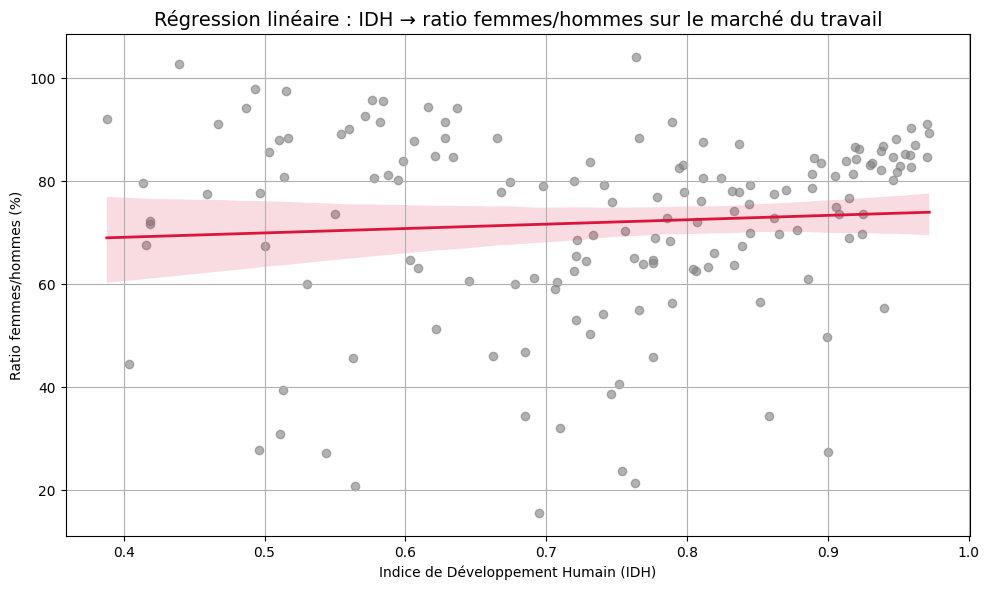

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Nettoyage + conversion en float
df_reg = df_merged[["IDH", "gender_ratio_participation"]].dropna().copy()
df_reg["IDH"] = pd.to_numeric(df_reg["IDH"], errors="coerce")
df_reg["gender_ratio_participation"] = pd.to_numeric(df_reg["gender_ratio_participation"], errors="coerce")
df_reg = df_reg.dropna()

# Régression
X = sm.add_constant(df_reg["IDH"])
y = df_reg["gender_ratio_participation"]
model = sm.OLS(y, X).fit()

print(model.summary())

# Visualisation
plt.figure(figsize=(10, 6))
sns.regplot(data=df_reg, x="IDH", y="gender_ratio_participation", ci=95,
            scatter_kws={"color": "gray", "alpha": 0.6},
            line_kws={"color": "crimson", "linewidth": 2})
plt.title("Régression linéaire : IDH → ratio femmes/hommes sur le marché du travail", fontsize=14)
plt.xlabel("Indice de Développement Humain (IDH)")
plt.ylabel("Ratio femmes/hommes (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

Les résultats du modèle de régression linéaire montrent qu’il n’existe pas de relation linéaire significative entre l’IDH d’un pays et le ratio femmes/hommes dans la population active. Le R² très faible (0.005) indique que l’IDH n’explique quasiment rien des différences observées entre les pays.

En complément de la lecture croisée des clusters, ce résultat renforce l’idée que le développement humain seul n’est pas un prédicteur fiable de l’égalité de genre sur le marché du travail. D’autres facteurs contextuels (culture, institutions, normes sociales) doivent être considérés pour expliquer ces inégalités.

# Conclusion générale

Ce projet a permis de mettre en évidence des disparités importantes entre les pays en matière d’inégalités de genre sur le marché du travail. Grâce à un clustering basé sur le ratio femmes/hommes, nous avons identifié différents profils de pays.
En croisant ces clusters avec ceux issus de l’IDH, nous avons observé une corrélation partielle entre développement humain et égalité de genre, bien que certaines exceptions notables nous rappellent que d’autres facteurs entrent en jeu (culture, politique, religion…).
La régression linéaire n’a pas mis en évidence de lien statistiquement significatif entre IDH et ratio femmes/hommes, confirmant que le développement humain ne suffit pas à lui seul à garantir l’égalité économique.
Ce projet ouvre la voie à de futures analyses multidimensionnelles intégrant d’autres variables explicatives.

Données utilisées :
	•	Taux de participation femmes/hommes (source : Data World Bank)
	•	Indice de développement humain (PNUD, 2023)

Outils :
	•	Python (pandas, matplotlib, seaborn, geopandas, scikit-learn)
	•	Google Colab